In [ ]:
!pip install tweepy textblob nltk wordcloud pandas matplotlib seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import re
import string


In [ ]:
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
from google.colab import files

uploaded = files.upload()


Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [9]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)

# Rename the columns to meaningful names
df.columns = ['target', 'id', 'date', 'query', 'user', 'text']

# Keep only the important columns
df = df[['text', 'target']]

# Preview the data
df.head()


,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [10]:
df['target'].value_counts()


,count
target,
0,800000
4,800000


In [11]:
df['sentiment'] = df['target'].apply(lambda x: 'Negative')
df[['text', 'sentiment']].head()


,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative


In [12]:
import re
import string

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www.\S+", "", text)  # remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)        # remove mentions & hashtags
    text = re.sub(r"[^\w\s]", "", text)          # remove punctuation
    text = re.sub(r"\d+", "", text)              # remove numbers
    text = re.sub(r"\s+", " ", text).strip()     # remove extra whitespace
    return text

df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david carr...
1,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sav...
3,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i her...


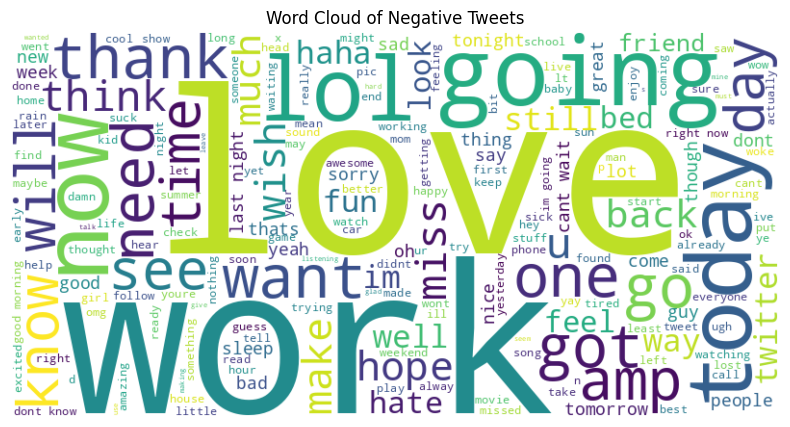

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Tweets")
plt.show()


In [14]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['polarity'], bins=50, kde=True, color='red')
plt.title('Polarity Distribution of Negative Tweets')
plt.xlabel('Polarity Score')
plt.ylabel('Tweet Count')
plt.show()


KeyError: 'polarity'

<Figure size 800x500 with 0 Axes>

In [15]:
print(df.columns)


Index(['text', 'target', 'sentiment', 'clean_text'], dtype='object')


In [17]:
from textblob import TextBlob

# Add polarity column
df['polarity'] = df['clean_text'].apply(lambda text: TextBlob(text).sentiment.polarity)


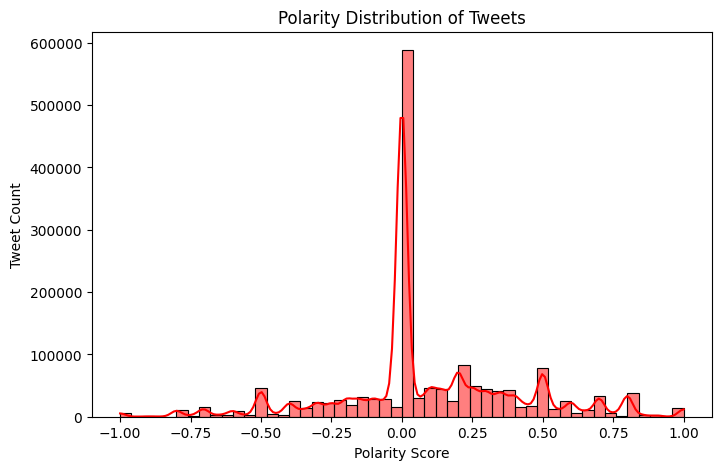

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['polarity'], bins=50, kde=True, color='red')
plt.title('Polarity Distribution of Tweets')
plt.xlabel('Polarity Score')
plt.ylabel('Tweet Count')
plt.show()
